In [2]:
from torchvision import models

In [3]:
fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import torch

!wget -nv https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg -O bird.png

2020-03-09 14:50:56 URL:https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg [182965/182965] -> "bird.png" [1]


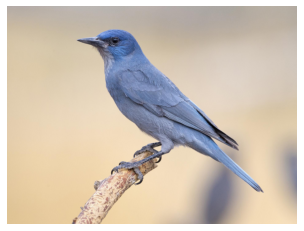

In [8]:
img = Image.open('./bird.png')
# img
plt.imshow(img); plt.axis('off'); plt.show()

In [9]:
np.array(img).shape

(1414, 1885, 3)

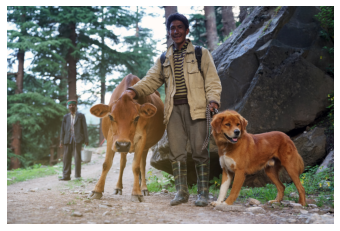

In [12]:
img2 = Image.open('./trekking.jpg')

plt.imshow(img2); plt.axis('off'); plt.show()

In [13]:

import torchvision.transforms as T

In [14]:
trf = T.Compose([T.Resize(256),
                 T.CenterCrop(224),
                 T.ToTensor(),
                 T.Normalize(mean = [0.485, 0.456, 0.406],
                             std = [0.229, 0.224, 0.225])])

inp = trf(img).unsqueeze(0)
inp2 = trf(img2).unsqueeze(0)

In [15]:
out = fcn(inp)['out']
out2 = fcn(inp2)['out']

print(out.shape)
print(out2.shape)

torch.Size([1, 21, 224, 224])
torch.Size([1, 21, 224, 224])


In [16]:
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
om2 = torch.argmax(out2.squeeze(), dim=0).detach().cpu().numpy()

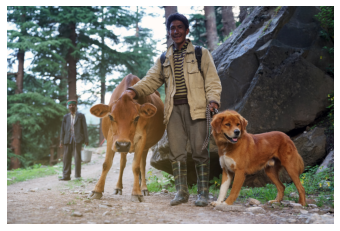

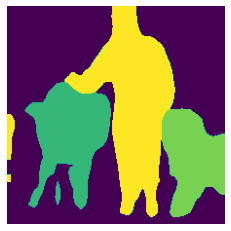

In [17]:
plt.imshow(img2); plt.axis('off'); plt.show()

plt.imshow(om2); plt.axis('off'); plt.show()

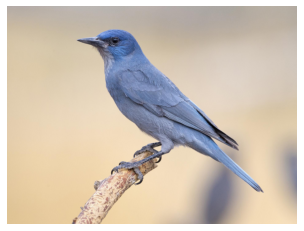

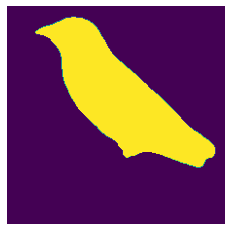

In [18]:
plt.imshow(img); plt.axis('off'); plt.show()

plt.imshow(om); plt.axis('off'); plt.show()

In [21]:
img3 = Image.open('./horse.jpg')

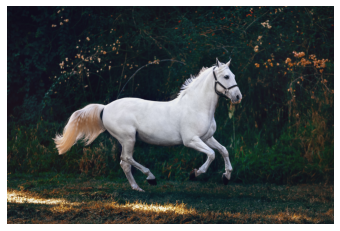

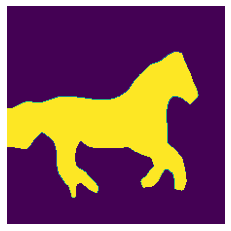

In [22]:
inp3 = trf(img3).unsqueeze(0)
out3 = fcn(inp3)['out']
om3 = torch.argmax(out3.squeeze(), dim=0).detach().cpu().numpy()

plt.imshow(img3); plt.axis('off'); plt.show()
plt.imshow(om3); plt.axis('off'); plt.show()